<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
#import csv file
sat_scores_csv = "./sat_scores.csv"
sat_scores = pd.read_csv(sat_scores_csv)

sat_scores.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [3]:
#convert to dictionary format
data = sat_scores.to_dict(orient='list')
data

{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS',
  'All'],
 'Rate': [82,
  81,
  79,
  77,
  72,
  71,
  71,
  69,
  69,
  68,
  67,
  65,
  65,
  63,
  60,
  57,
  56,
  55,
  54,
  53,
  53,
  52,
  51,
  51,
  34,
  33,
  31,
  26,
  23,
  18,
  17,
  13,
  13,
  12,
  12,
  11,
  11,
  9,
  9,
  9,
  8,
  8,
  8,
  7,
  6,
  6,
  5,
  5,
  4,
  4,
  4,
  45],
 'Verbal': [509,
  499,
  511,
  495,
  520,
  501,
  500,
  511,
  506,
  510,
  501,
  508,
  493,
  491,
  499,
  486,
  482,
  526,
  498,
  527,
  493,
  485,
  514,
  498,
  523,
  509,
  539,
  534,
  539,
  527,
  543,
  562,
  551,
  576,
  550,
  547,
  56

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [4]:
#make a pandas DF object with the SAT dictionary
data_dict = pd.DataFrame.from_dict(data,orient = 'index')


In [5]:
#data types for DF made with CSV file
sat_scores.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [6]:
sat_scores.describe

<bound method NDFrame.describe of    State  Rate  Verbal  Math
0     CT    82     509   510
1     NJ    81     499   513
2     MA    79     511   515
3     NY    77     495   505
4     NH    72     520   516
5     RI    71     501   499
6     PA    71     500   499
7     VT    69     511   506
8     ME    69     506   500
9     VA    68     510   501
10    DE    67     501   499
11    MD    65     508   510
12    NC    65     493   499
13    GA    63     491   489
14    IN    60     499   501
15    SC    57     486   488
16    DC    56     482   474
17    OR    55     526   526
18    FL    54     498   499
19    WA    53     527   527
20    TX    53     493   499
21    HI    52     485   515
22    AK    51     514   510
23    CA    51     498   517
24    AZ    34     523   525
25    NV    33     509   515
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV    18     527   512
30    ID    17     543   542
31    TN    13     562   553
32    NM 

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [7]:
#Data describes the verbal and math scores for each state and the passing rates
sat_scores.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

Name | Type | Description
------ | ------ | --------------------------------------
State | object | Name of state
Rate | integer | Participation rate for each state
Verbal | integer | Score for verbal component
Math | integer | Score for math component



In [8]:
#shape of dataset
sat_scores.shape

(52, 4)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [9]:
import seaborn as sns, numpy as np 

In [10]:
# for all charts label x axis y axis legend, x limit y limit title tick albels font size fig size olours xlim y lim)

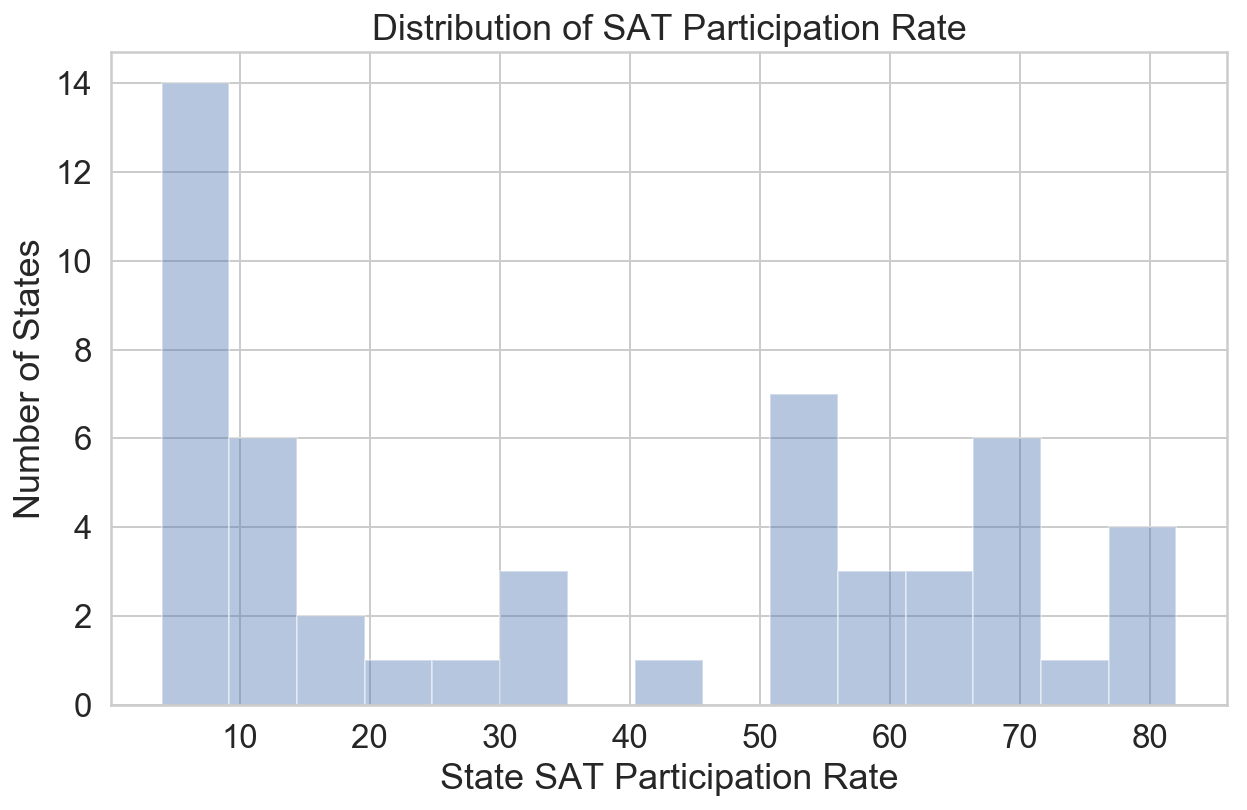

In [11]:
#distplot - Rate 
sns.set(rc={'figure.figsize':(10,6)},style='whitegrid',font_scale=1.5)
sns.distplot(sat_scores['Rate'], 
             bins=15, 
             kde=False,).set_title('Distribution of SAT Participation Rate')

plt.ylabel('Number of States',rotation=90)
plt.xlabel('State SAT Participation Rate',rotation=0);

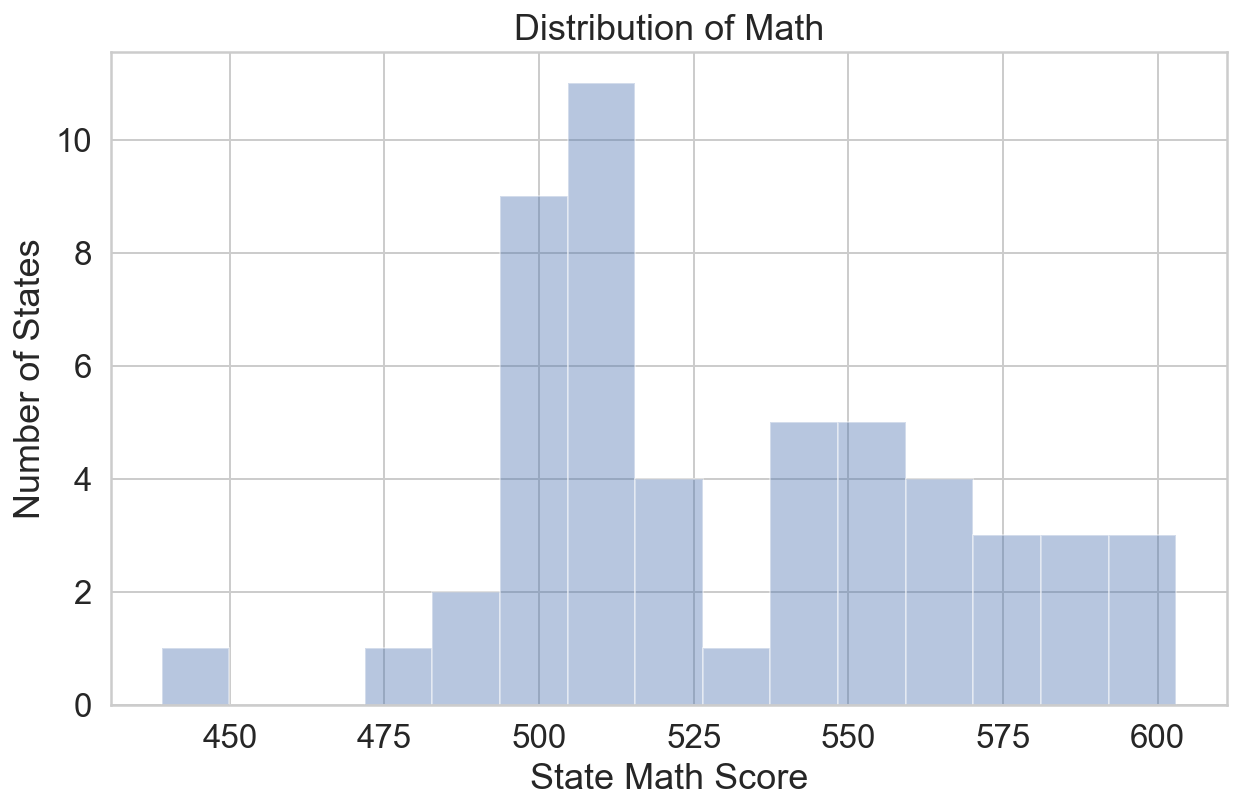

In [12]:
#distplot - Math
sns.set(rc={'figure.figsize':(10,6)},style='whitegrid',font_scale=1.5)
sns.distplot(sat_scores['Math'], 
             bins=15, 
             kde=False).set_title('Distribution of Math');

plt.ylabel('Number of States',rotation=90)
plt.xlabel('State Math Score',rotation=0);

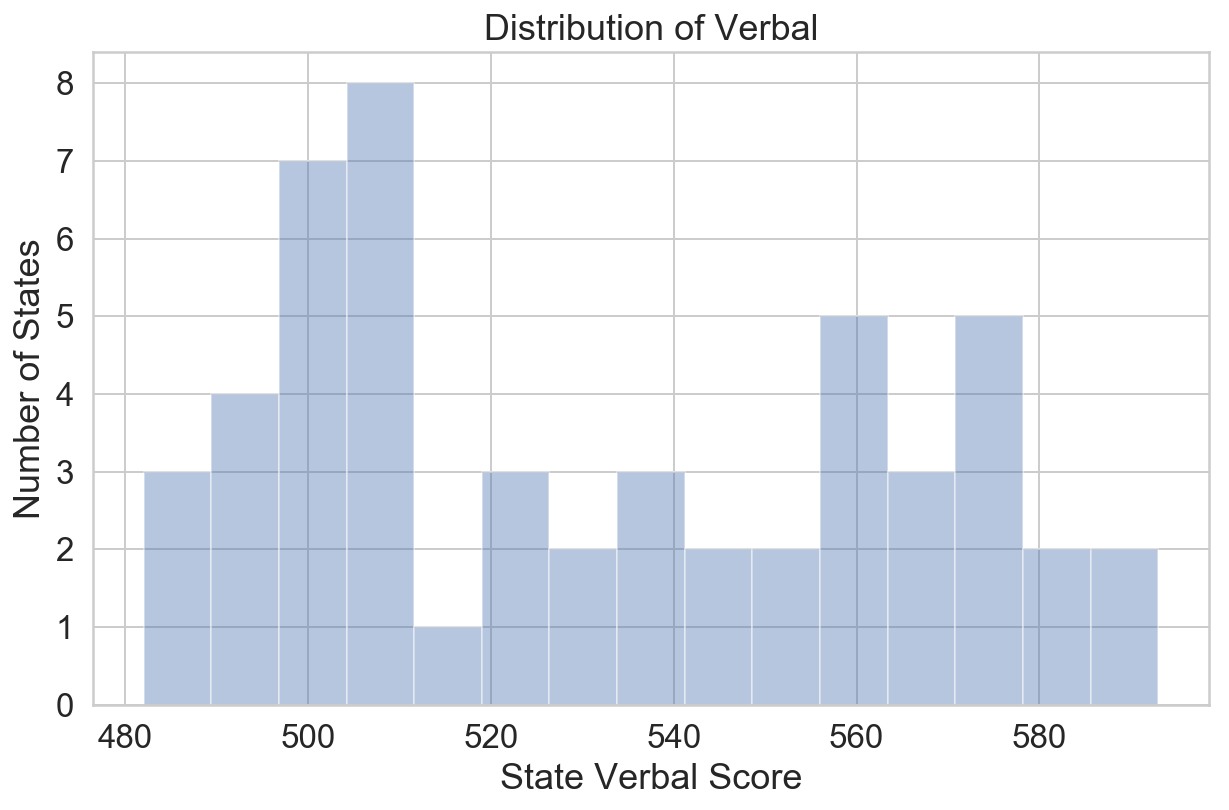

In [13]:
#distplot - Verbal
sns.set(rc={'figure.figsize':(10,6)},style='whitegrid',font_scale=1.5)
sns.distplot(sat_scores['Verbal'], bins=15, kde=False).set_title('Distribution of Verbal');

plt.ylabel('Number of States',rotation=90)
plt.xlabel('State Verbal Score',rotation=0);

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

/Users/Candiceluo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/Candiceluo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/Candiceluo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/Candiceluo/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/Users/Candiceluo/anaconda3/lib/py

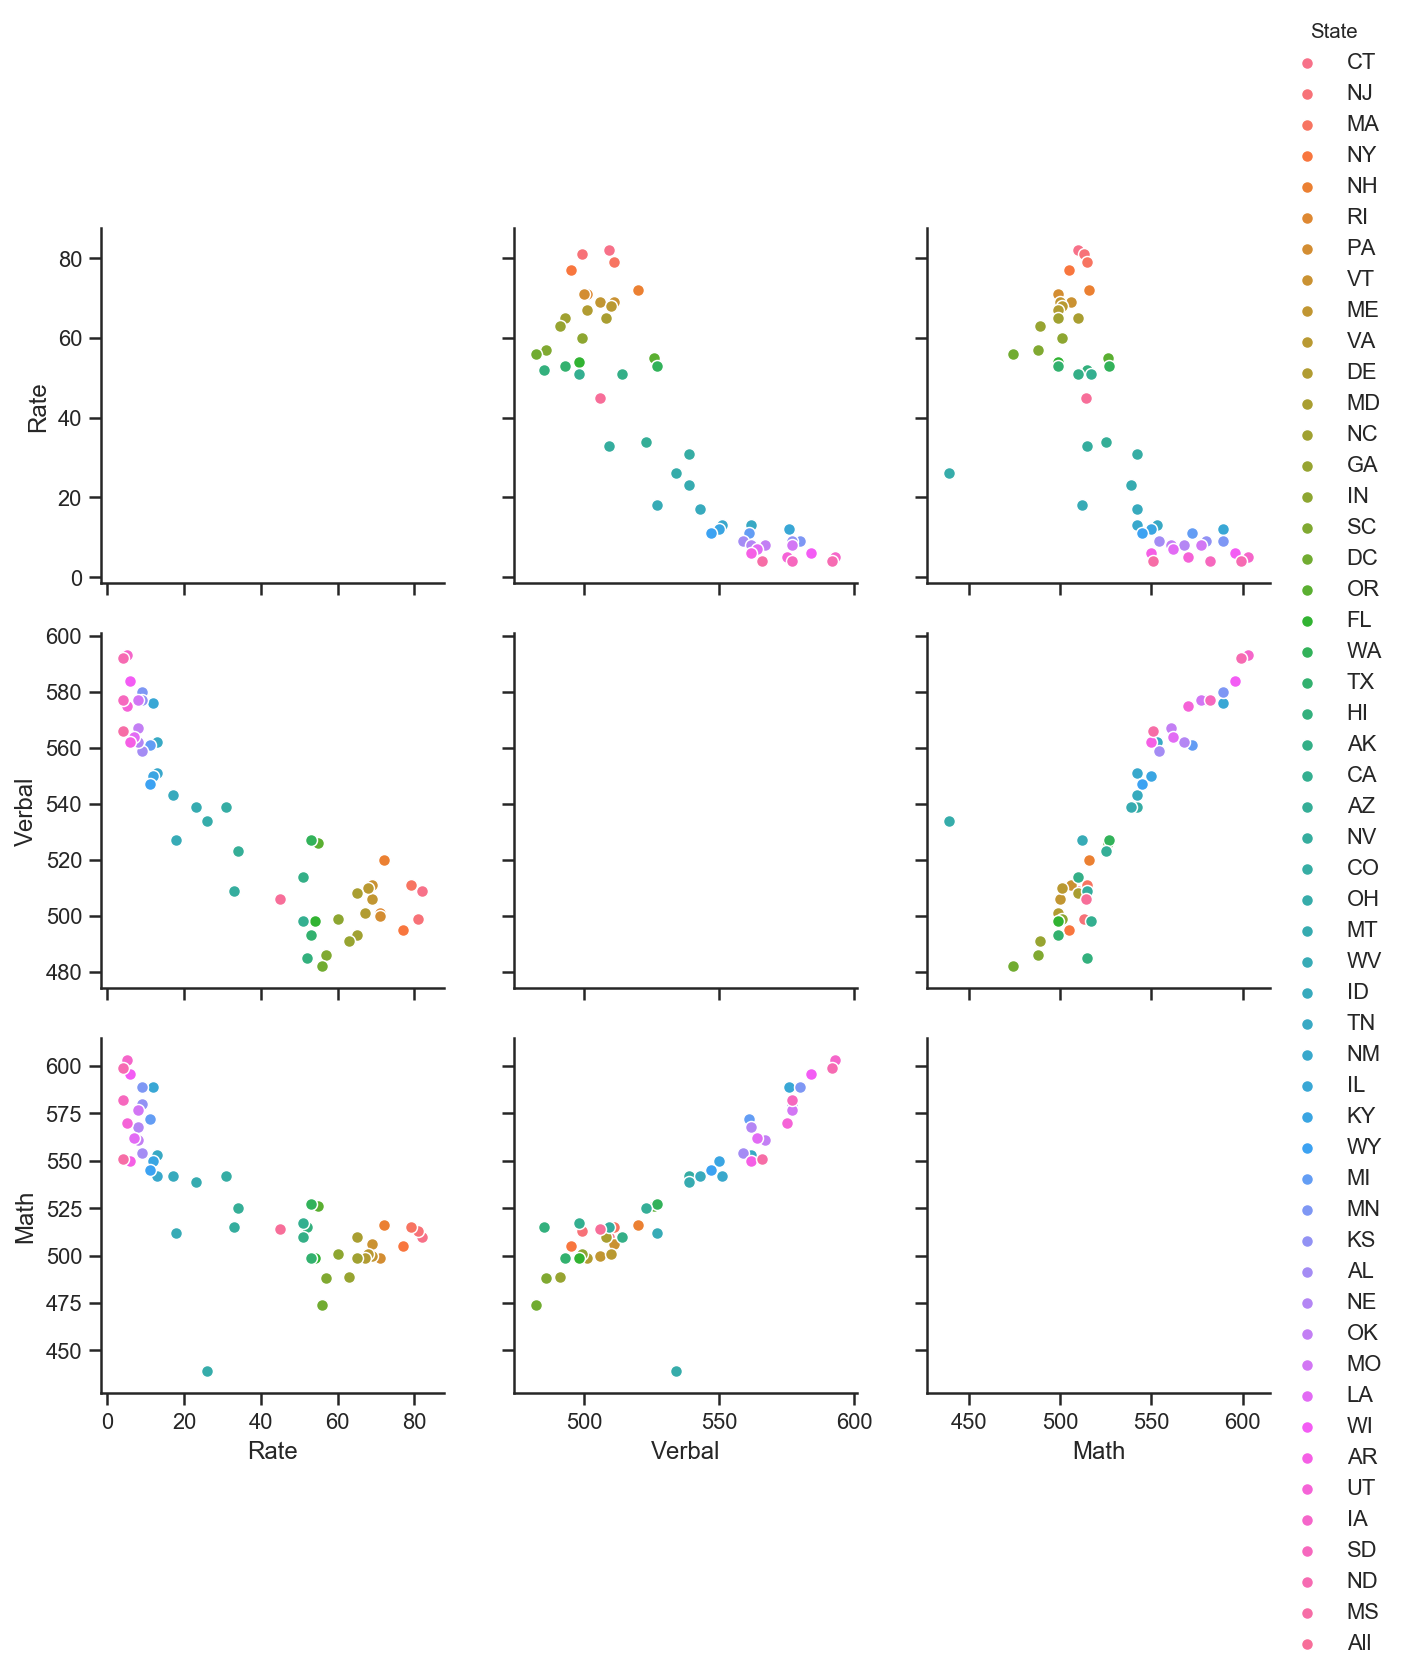

In [14]:
#pairplot - Rate
import seaborn as sns; sns.set(style="ticks", color_codes=True)
sns.pairplot(sat_scores,height = 3, palette="husl", hue = "State");

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

Text(0.5,1,'Verbal and Math scores')

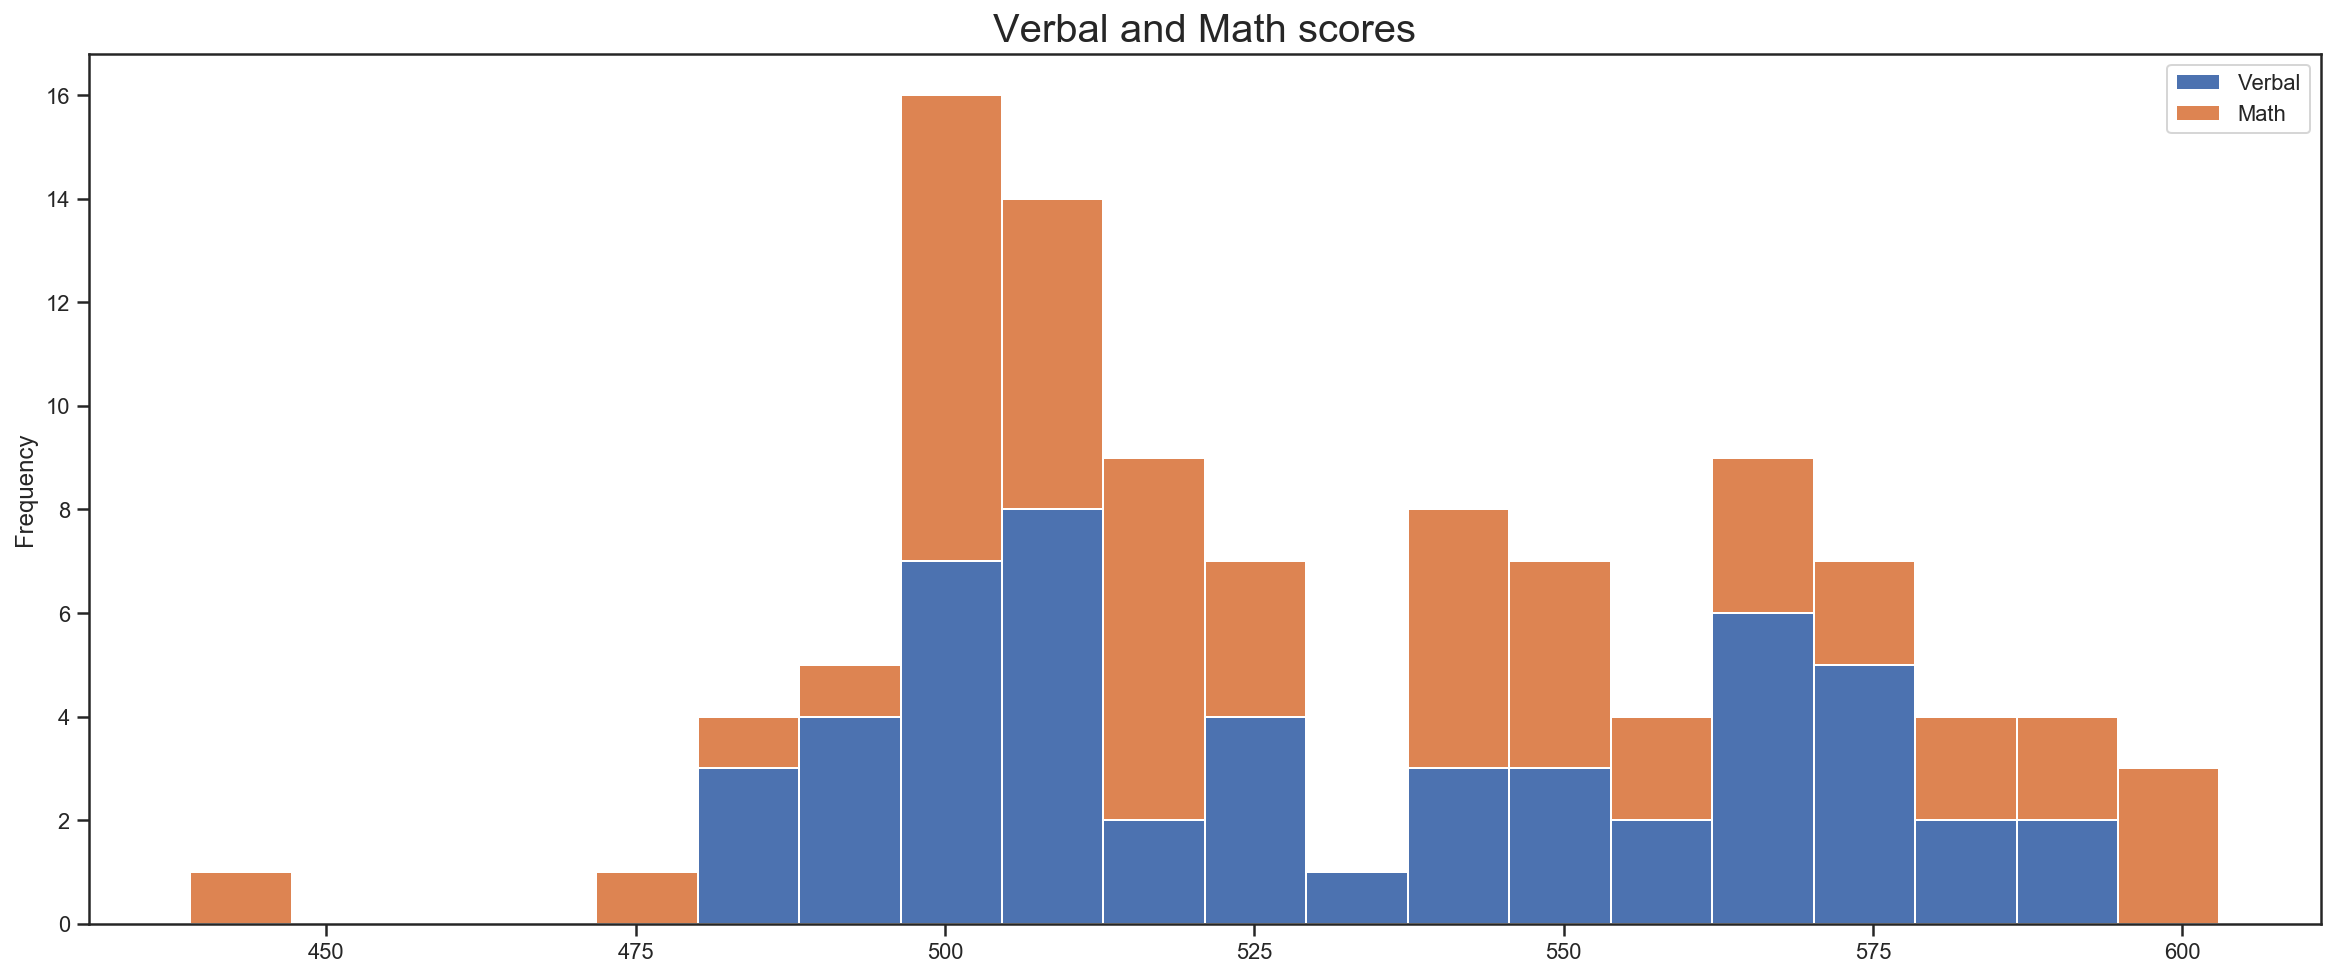

In [15]:
import matplotlib.pyplot as plt

sat_scores[['Verbal','Math']].plot.hist(stacked=True, bins=20, figsize = (20,8)).set_title("Verbal and Math scores", fontsize = 20)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

Text(0.5,1,'Verbal and Math scores')

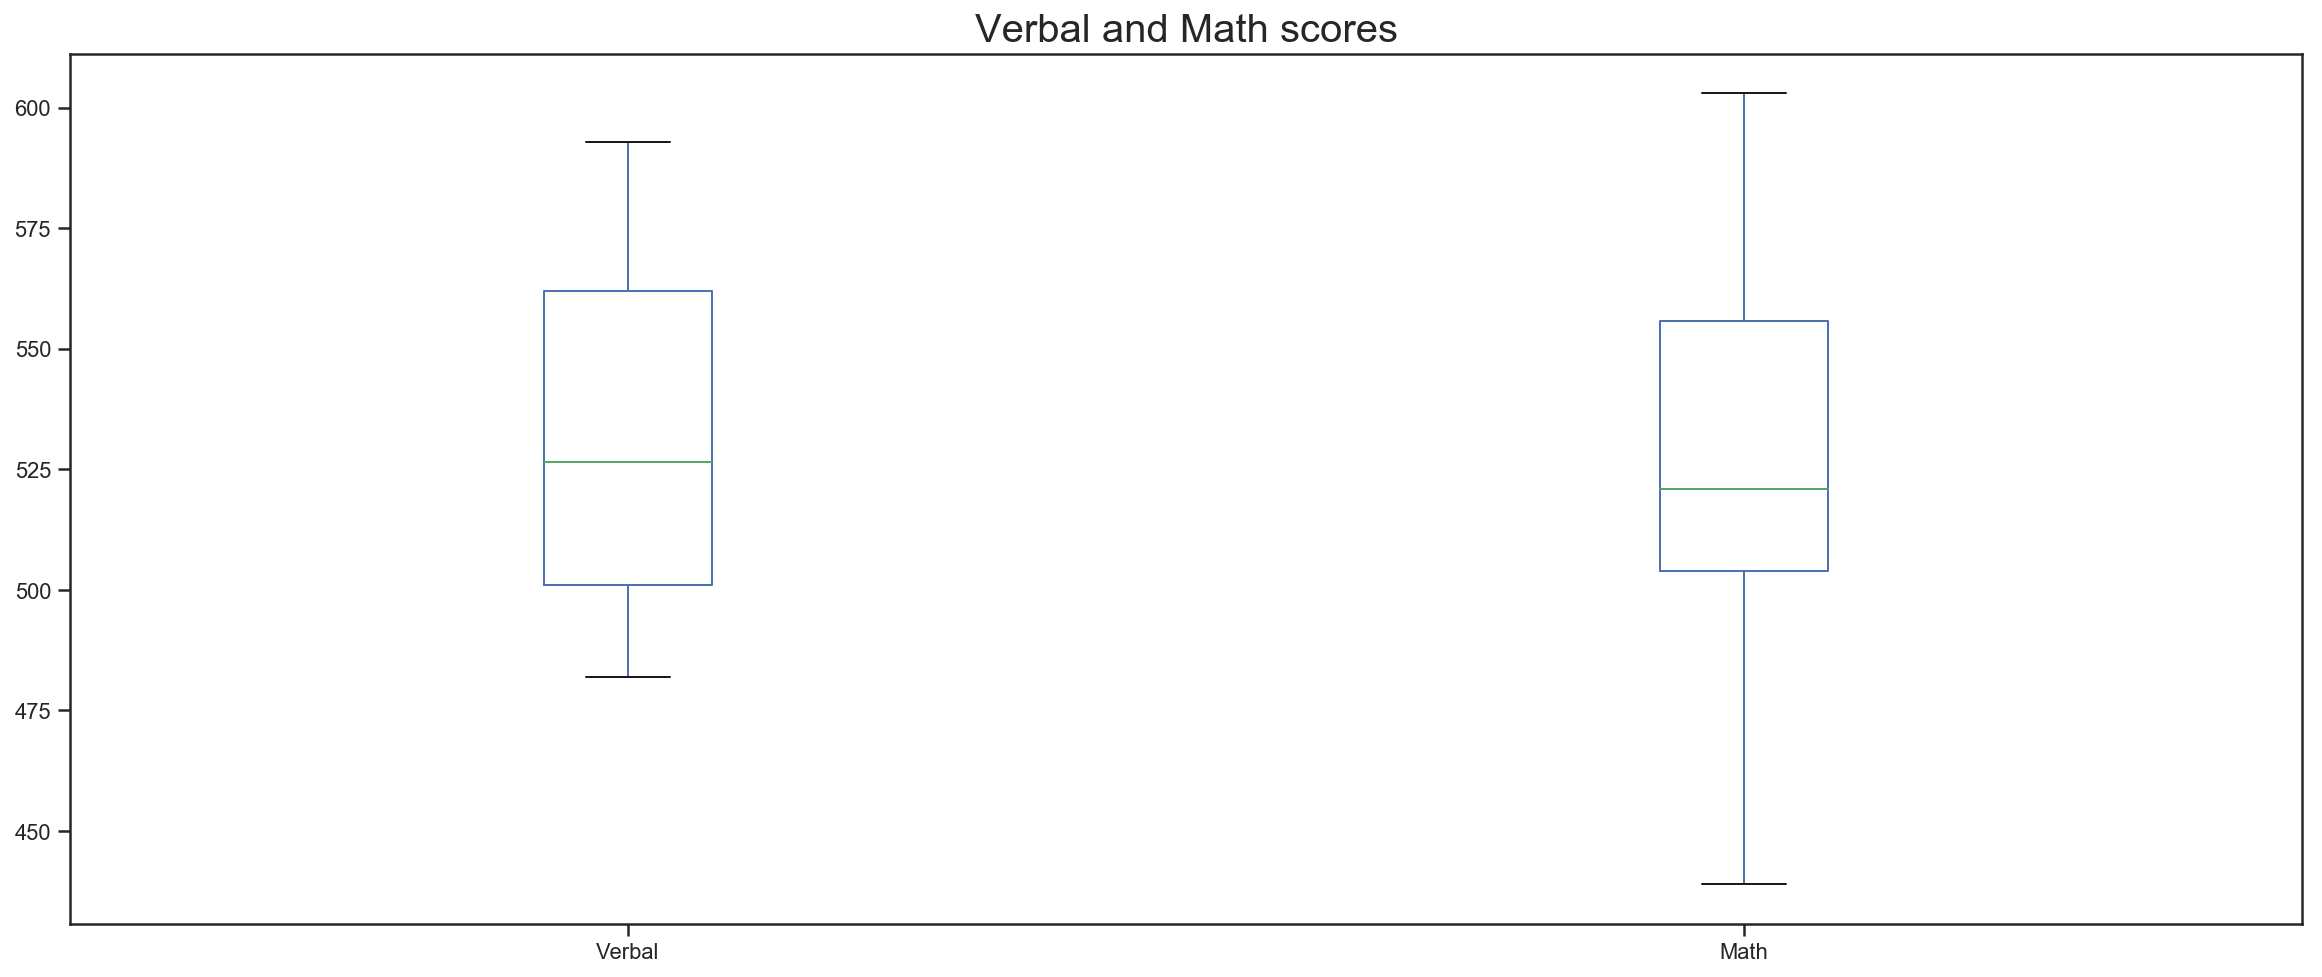

In [16]:
sat_scores[['Verbal','Math']].plot.box(figsize = (20,8)).set_title("Verbal and Math scores", fontsize = 20)

In [17]:
# What are the benefits of using a boxplot as compared to a scatterplot or a histogram?
# Boxplot shows the outliers in the data set which is not shown by scatterplots or histograms
# What's wrong with plotting a box-plot of Rate on the same chart as Math and Verbal?
# Rate is a percentage while Math and Verbal are based off the total score of 800 so the boxplots would be plotted on a different scale.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


Text(0.5,1,'Verbal and Math scores')

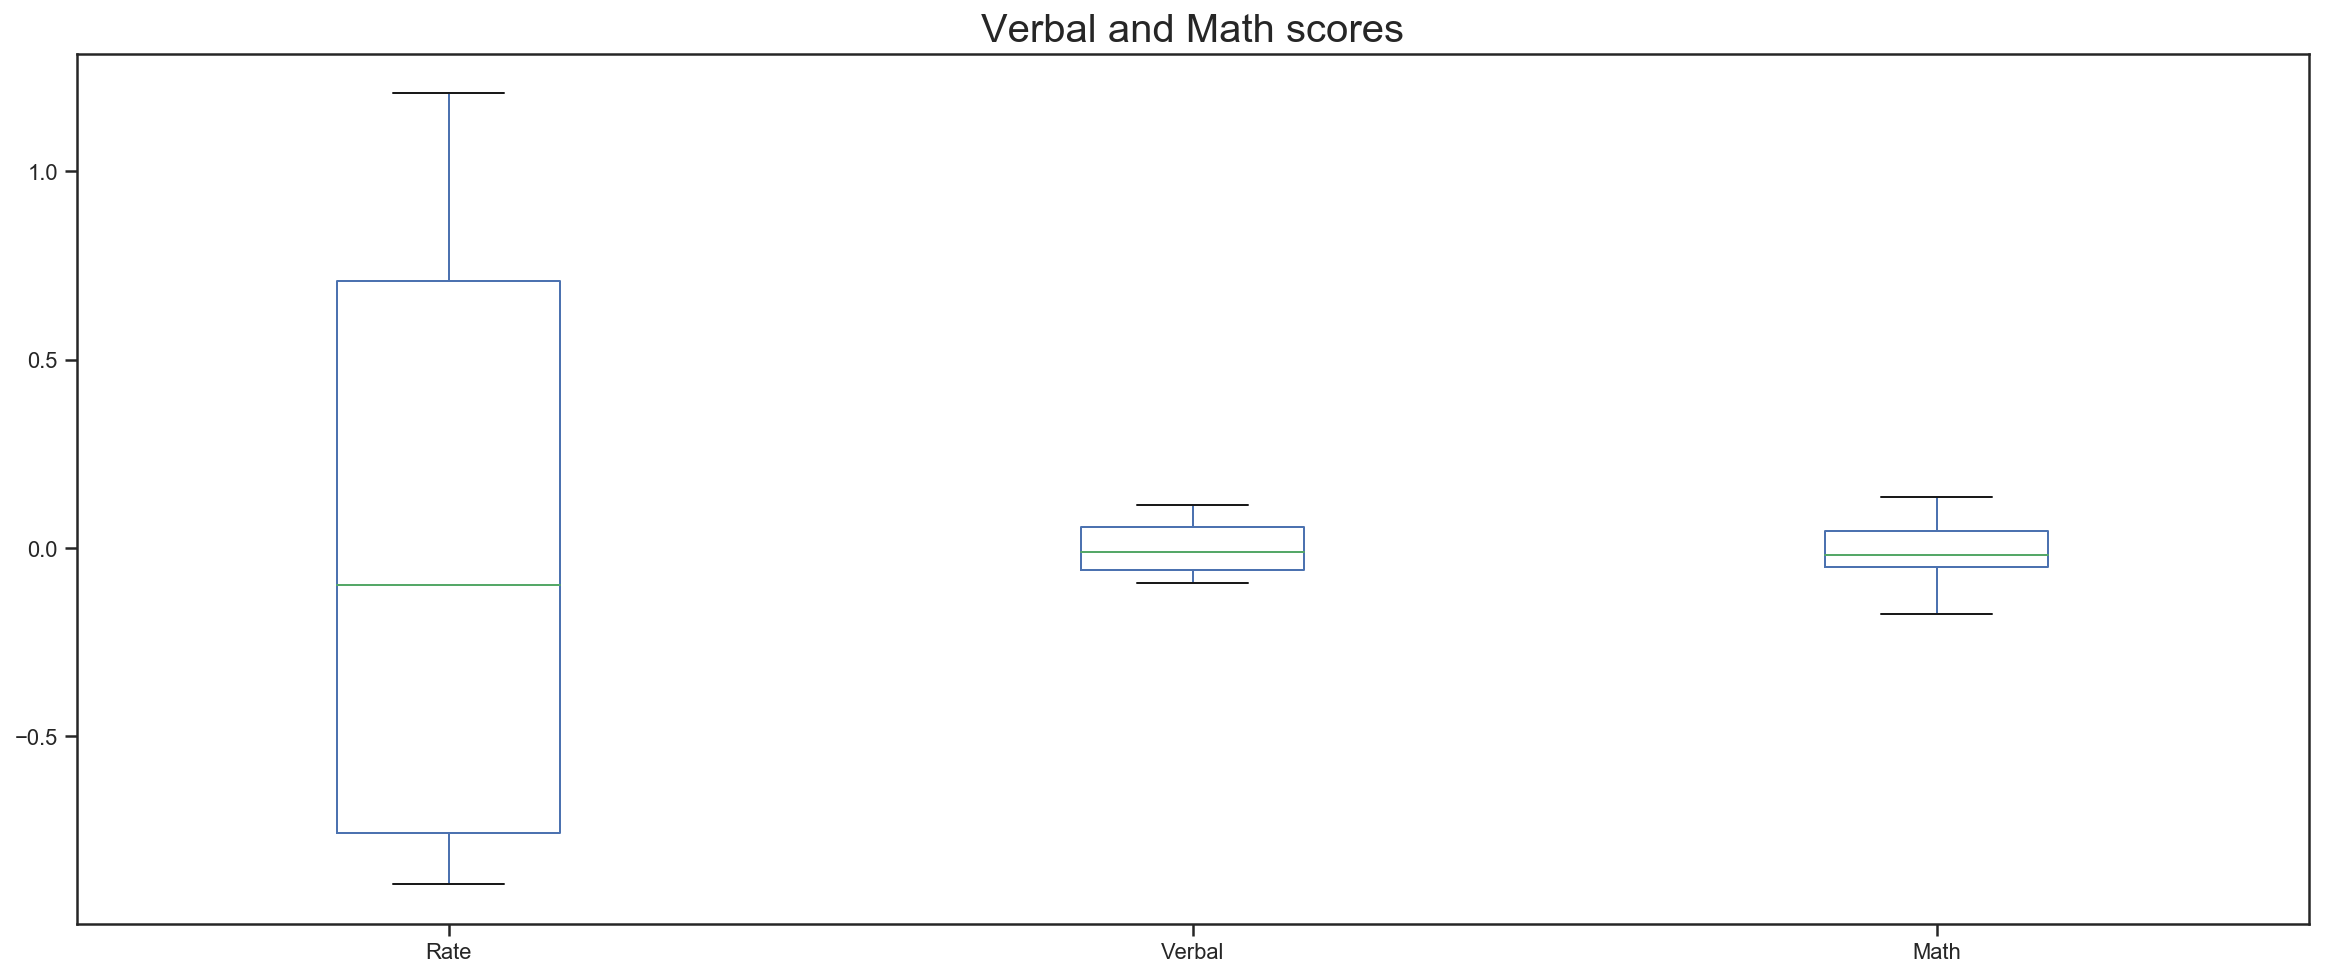

In [18]:
#standardize the variables for plotting in a box plot
sat_drop_rate = sat_scores.drop(['State'], axis=1)

sat_scores_stand = (sat_drop_rate - sat_drop_rate.mean()) / sat_drop_rate.mean()

sat_scores_stand.plot.box(figsize = (20,8)).set_title("Verbal and Math scores", fontsize = 20)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [19]:
#calculate average verbal scores across states
verbal_mean = sat_scores['Verbal'].mean()
print(verbal_mean)

532.0192307692307


In [20]:
# calculate number of states with verbal scores above mean
sat_scores[sat_scores['Verbal']>verbal_mean]
# there are 24 states that have verbal scores greater than average scores across states

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


In [21]:
# Show number of states with verbal score greater than mean
sat_scores[sat_scores['Verbal']>verbal_mean].count()

State     24
Rate      24
Verbal    24
Math      24
dtype: int64

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [22]:
#calculate median verbal score
verbal_median = sat_scores['Verbal'].median()
print(verbal_median)

526.5


In [23]:
# verbal scores above median
sat_scores[sat_scores['Verbal']>verbal_median]
# there are 26 states that have verbal scores greater than average scores across states. 
# there are more states with a score greater than the median than the mean, the distribution is left skewed

,State,Rate,Verbal,Math
19,WA,53,527,527
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
29,WV,18,527,512
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550


In [24]:
# show number of states with verbal score greater than median
sat_scores[sat_scores['Verbal']>verbal_median].count()

State     26
Rate      26
Verbal    26
Math      26
dtype: int64

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [25]:
#calculate difference between verbal and math scores in a new column
sat_scores['Difference'] = sat_scores['Verbal']-sat_scores['Math']
sat_scores.head()

,State,Rate,Verbal,Math,Difference
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [26]:
#sort dataframe by descending values in Difference column and 
#show 10 states with greatest gap between Verbal and Math scores
verbal_greater = sat_scores.sort_values(by=['Difference'],ascending=False)[:10]
verbal_greater.head(3)

,State,Rate,Verbal,Math,Difference
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [27]:
math_greater = sat_scores.sort_values(by=['Difference'],ascending=True)[:10]
math_greater.head(3)

,State,Rate,Verbal,Math,Difference
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


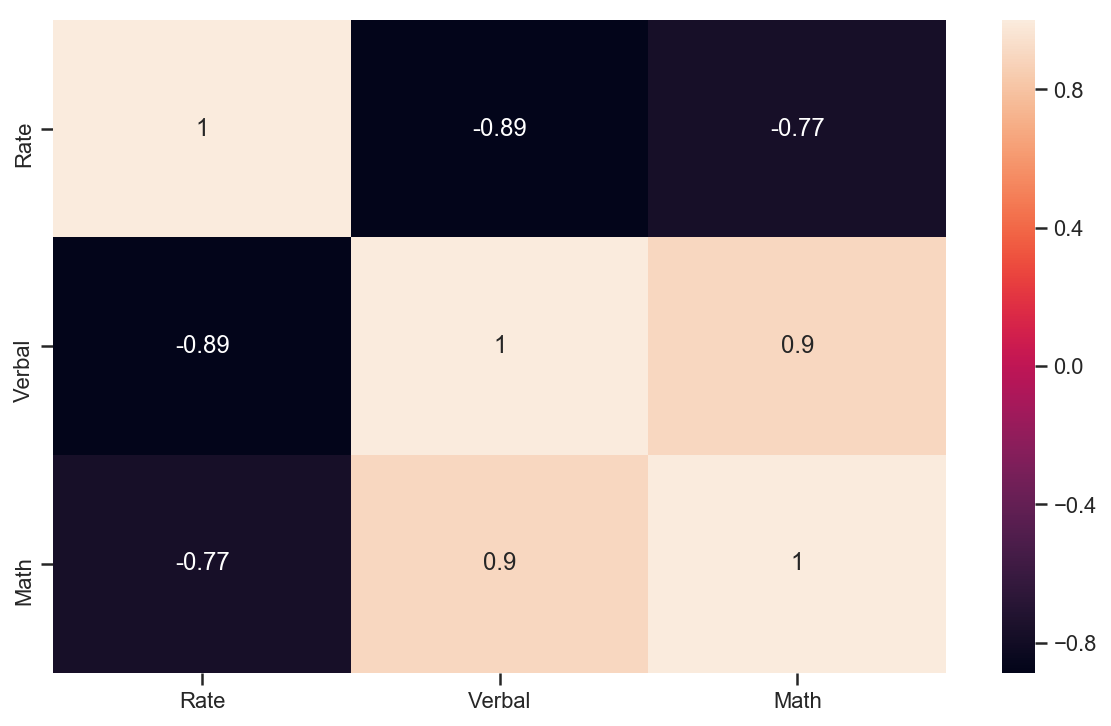

In [28]:
#remove "State" and "Difference" columns
exclude_state = sat_scores.drop(['State','Difference'], axis=1)

#create correlation matrix
sns.heatmap(exclude_state.corr(), annot = True);
sns.set(rc={'figure.figsize':(5,3)},style='whitegrid',font_scale=1.5)

Participation rate is negatively correlated to the math and verbal scores. Lower participation rates usually result in higher math and verbal scores.
There is high correlation between verbal and math scores. Students who do well in math tend to do well in verbal too.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [29]:
#answer in markdown
sat_scores.describe()

#There are a total of 52 states 

,Rate,Verbal,Math,Difference
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [30]:
# Describe how the covariance matrix is different from the correlation matrix.
# Answer: The covariance is a measure of "relatedness" between variables.
# What is the process to convert the covariance into the correlation?
# Answer: Pearson correlationr=cor(X,Y)=cov(X,Y)std(X)std(Y)
# Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?
# Answer: Covariance is not easy to interpret. 
# The values are difficult to read because they are relative to the variance of the variables.

In [62]:
np.cov(exclude_state, bias=True)

array([[40612.66666667, 40377.33333333, 41230.66666667, ...,
        56193.66666667, 52675.        , 44176.33333333],
       [40377.33333333, 40171.55555556, 40998.22222222, ...,
        55880.22222222, 52334.44444444, 43935.33333333],
       [41230.66666667, 40998.22222222, 41859.55555556, ...,
        57051.55555556, 53468.44444444, 44852.        ],
       ...,
       [56193.66666667, 55880.22222222, 57051.55555556, ...,
        77757.55555556, 72868.44444444, 61131.        ],
       [52675.        , 52334.44444444, 53468.44444444, ...,
        72868.44444444, 68364.22222222, 57278.33333333],
       [44176.33333333, 43935.33333333, 44852.        , ...,
        61131.        , 57278.33333333, 48060.66666667]])

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [31]:
# Load in data
# hygiene checks: null weird values are data types for each column correct .describe.info
# understand what data are you looking at - what do the columns rows numbers mean
# any possible problems in the dataset (eg aggregated age bands
# identify adn fix or find workarounds so that your data is ready for the next step)

In [32]:
drug_use =pd.read_csv('./drug-use-by-age.csv') 
drug_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [33]:
#summary statistics for the drug use data
drug_use[['alcohol-use','marijuana-use','cocaine-use', 'crack-use', 
           'heroin-use', 'hallucinogen-use', 'inhalant-use', 'pain-releiver-use',  
           'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use', 'sedative-use']].describe()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,55.429412,18.923529,2.176471,0.294118,0.352941,3.394118,1.388235,6.270588,0.935294,2.805882,1.917647,0.382353,0.282353
std,26.878866,11.959752,1.816772,0.235772,0.333762,2.792506,0.927283,3.166379,0.608216,1.753379,1.407673,0.262762,0.138000
min,3.900000,1.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.600000,0.000000,0.200000,0.000000,0.000000,0.000000
25%,40.100000,8.700000,0.500000,0.000000,0.100000,0.600000,0.600000,3.900000,0.400000,1.400000,0.600000,0.200000,0.200000
50%,64.600000,20.800000,2.000000,0.400000,0.200000,3.200000,1.400000,6.200000,1.100000,3.500000,1.800000,0.400000,0.300000
75%,77.500000,28.400000,4.000000,0.500000,0.600000,5.200000,2.000000,9.000000,1.400000,4.200000,3.000000,0.600000,0.400000
max,84.200000,34.000000,4.900000,0.600000,1.100000,8.600000,3.000000,10.000000,1.700000,5.400000,4.100000,0.900000,0.500000


In [34]:
drug_use.head(20)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [35]:
drug_use['cocaine-use'].unique()

array([0.1, 0.5, 1. , 2. , 3.2, 4.1, 4.9, 4.8, 4.5, 4. , 2.1, 1.5, 0.9,
       0. ])

In [36]:
drug_use['cocaine-use'].sum()

37.0

In [37]:
# drug_use  = drug_use.applymap(lambda x: np.nan if x == '-' else float(x))

In [38]:
#replace "-" with 0

drug_use['cocaine-frequency']  = drug_use['cocaine-frequency'].map(lambda x: np.nan if x == '-' else float(x))
drug_use['crack-frequency']  = drug_use['crack-frequency'].map(lambda x: np.nan if x == '-' else float(x))
drug_use['heroin-frequency']  = drug_use['heroin-frequency'].map(lambda x: np.nan if x == '-' else float(x))
drug_use['inhalant-frequency']  = drug_use['inhalant-frequency'].map(lambda x: np.nan if x == '-' else float(x))
drug_use['oxycontin-frequency']  = drug_use['oxycontin-frequency'].map(lambda x: np.nan if x == '-' else float(x))
drug_use['meth-frequency']  = drug_use['meth-frequency'].map(lambda x: np.nan if x == '-' else float(x))
drug_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [39]:
# helps to ask questions about the data
# univariate analysis
# long and short 

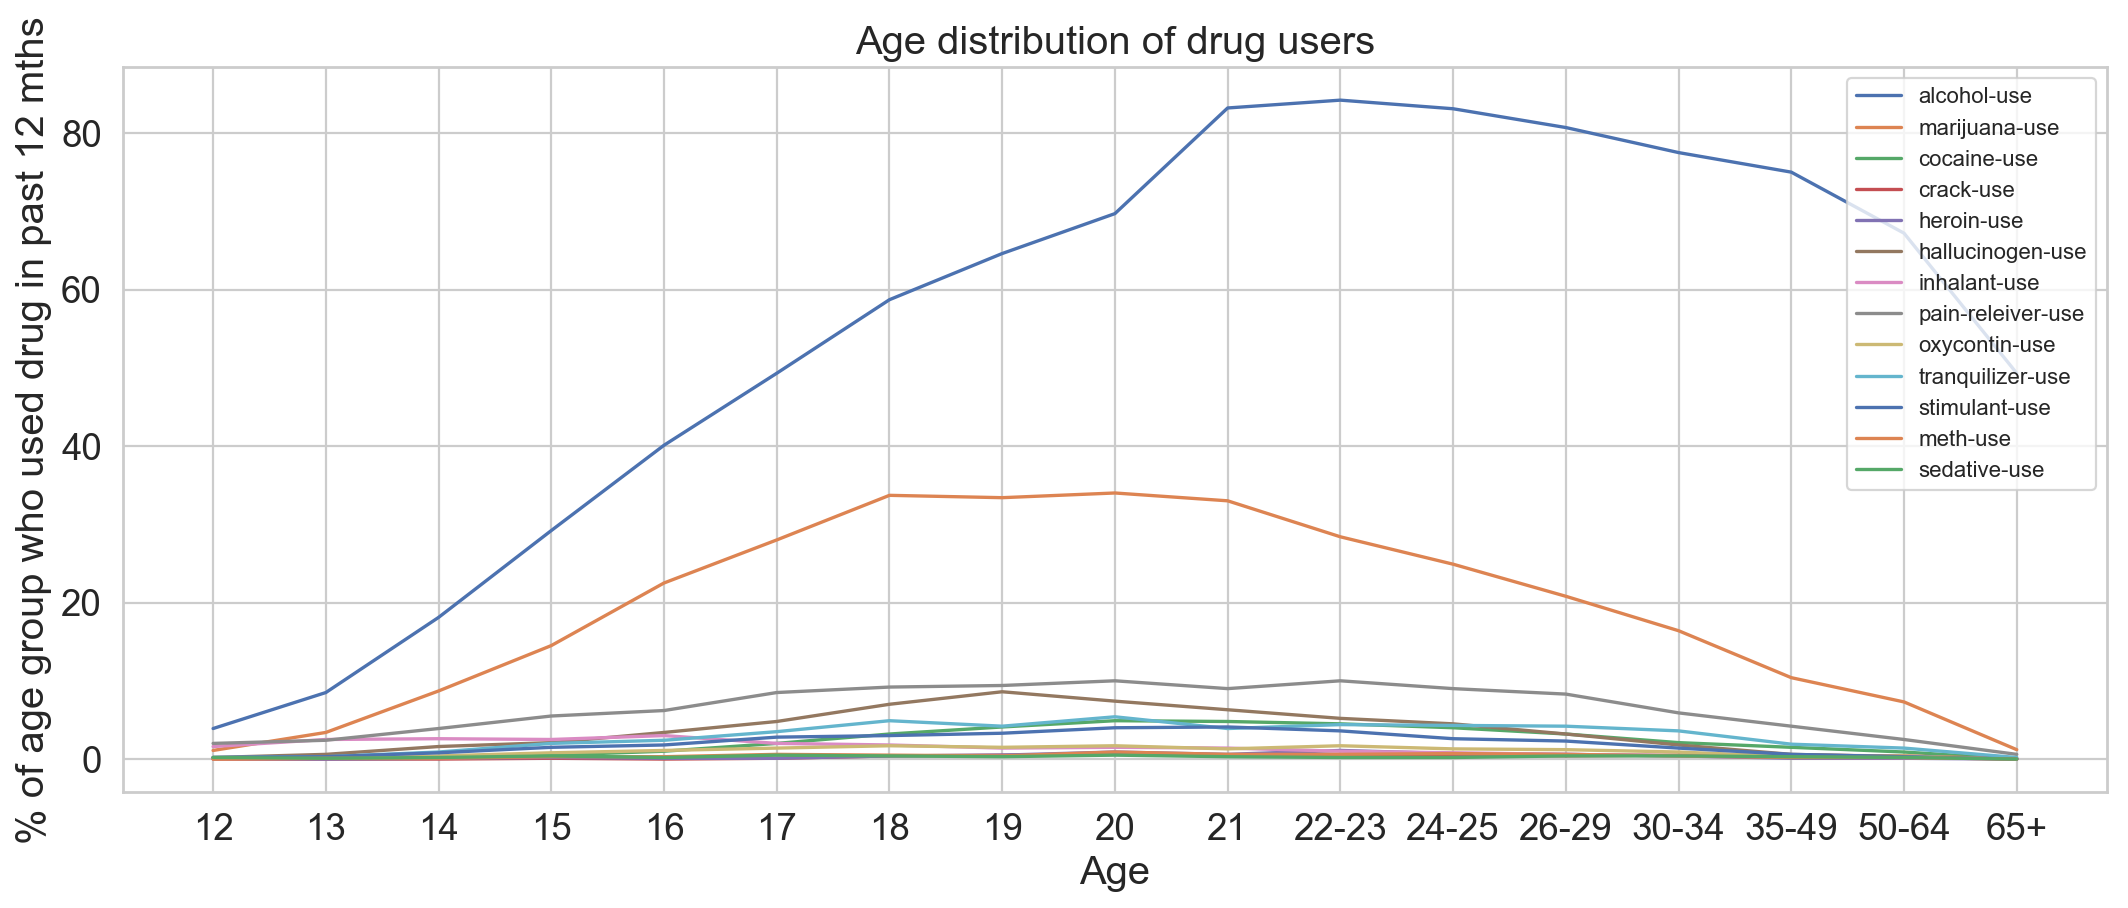

In [40]:
#plot age distribution of drug use 
druguse = ['alcohol-use','marijuana-use','cocaine-use', 'crack-use', 
           'heroin-use', 'hallucinogen-use', 'inhalant-use', 'pain-releiver-use',  
           'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use', 'sedative-use']
plt.figure(figsize=(16,6), dpi = 80)
for x in druguse:
    plt.plot(drug_use['age'], drug_use[x], label = x)
plt.legend(loc='upper right', fontsize = 10)
plt.title('Age distribution of drug users')
plt.xlabel('Age')
plt.ylabel('% of age group who used drug in past 12 mths');

From the graph above, it appears that alcohol and marijuana use are very commonly used. Hence we will omit it from the next graph to obtain a clearer picture of the age distribution of other types of drugs

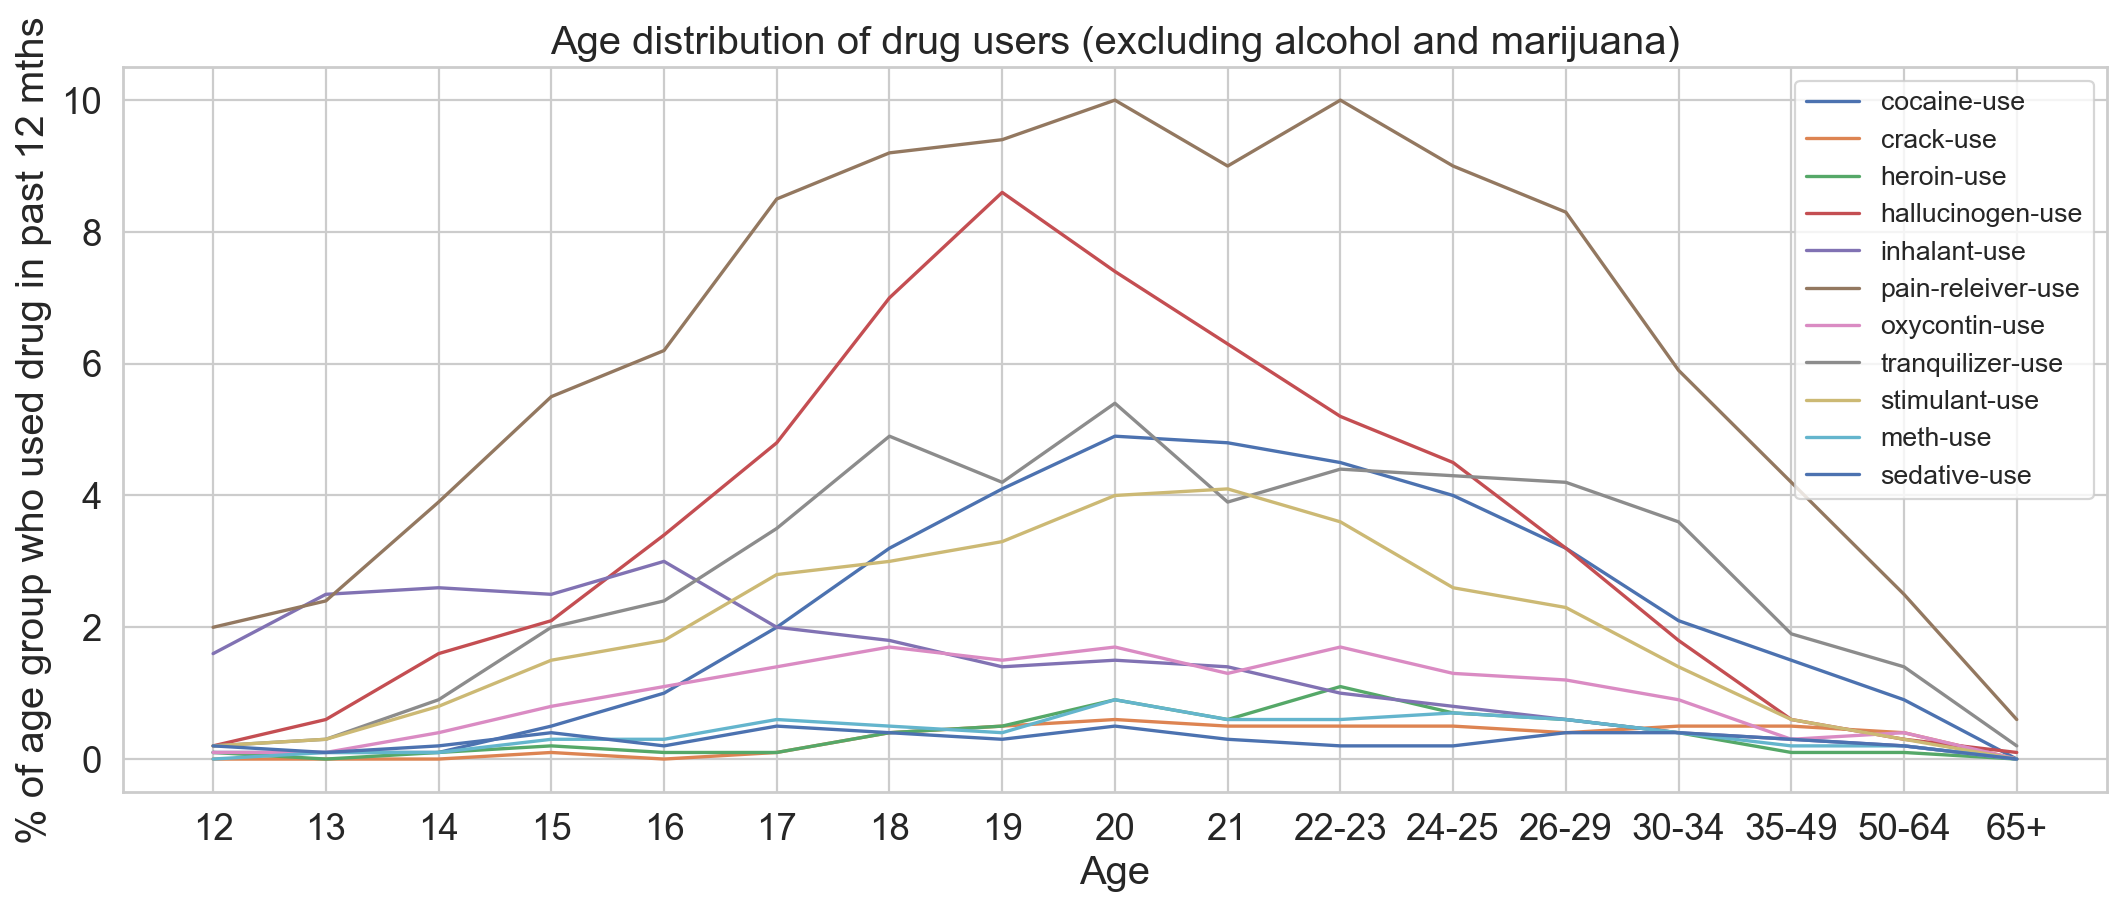

In [41]:
#plot age distribution of other types of drugs (excluding alcohol and marijuana)
druguse = ['cocaine-use', 'crack-use', 'heroin-use', 'hallucinogen-use', 
           'inhalant-use', 'pain-releiver-use',  'oxycontin-use', 'tranquilizer-use', 
           'stimulant-use', 'meth-use', 'sedative-use']
plt.figure(figsize=(16,6), dpi = 80)
for x in druguse:
    plt.plot(drug_use['age'], drug_use[x], label = x)
plt.legend(loc='upper right', fontsize = 12)
plt.title('Age distribution of drug users (excluding alcohol and marijuana)')
plt.xlabel('Age')
plt.ylabel('% of age group who used drug in past 12 mths');


Pain reliever appears to be the third most commonly used drug 
Hallucinogen use appears to be more commonly used by youths

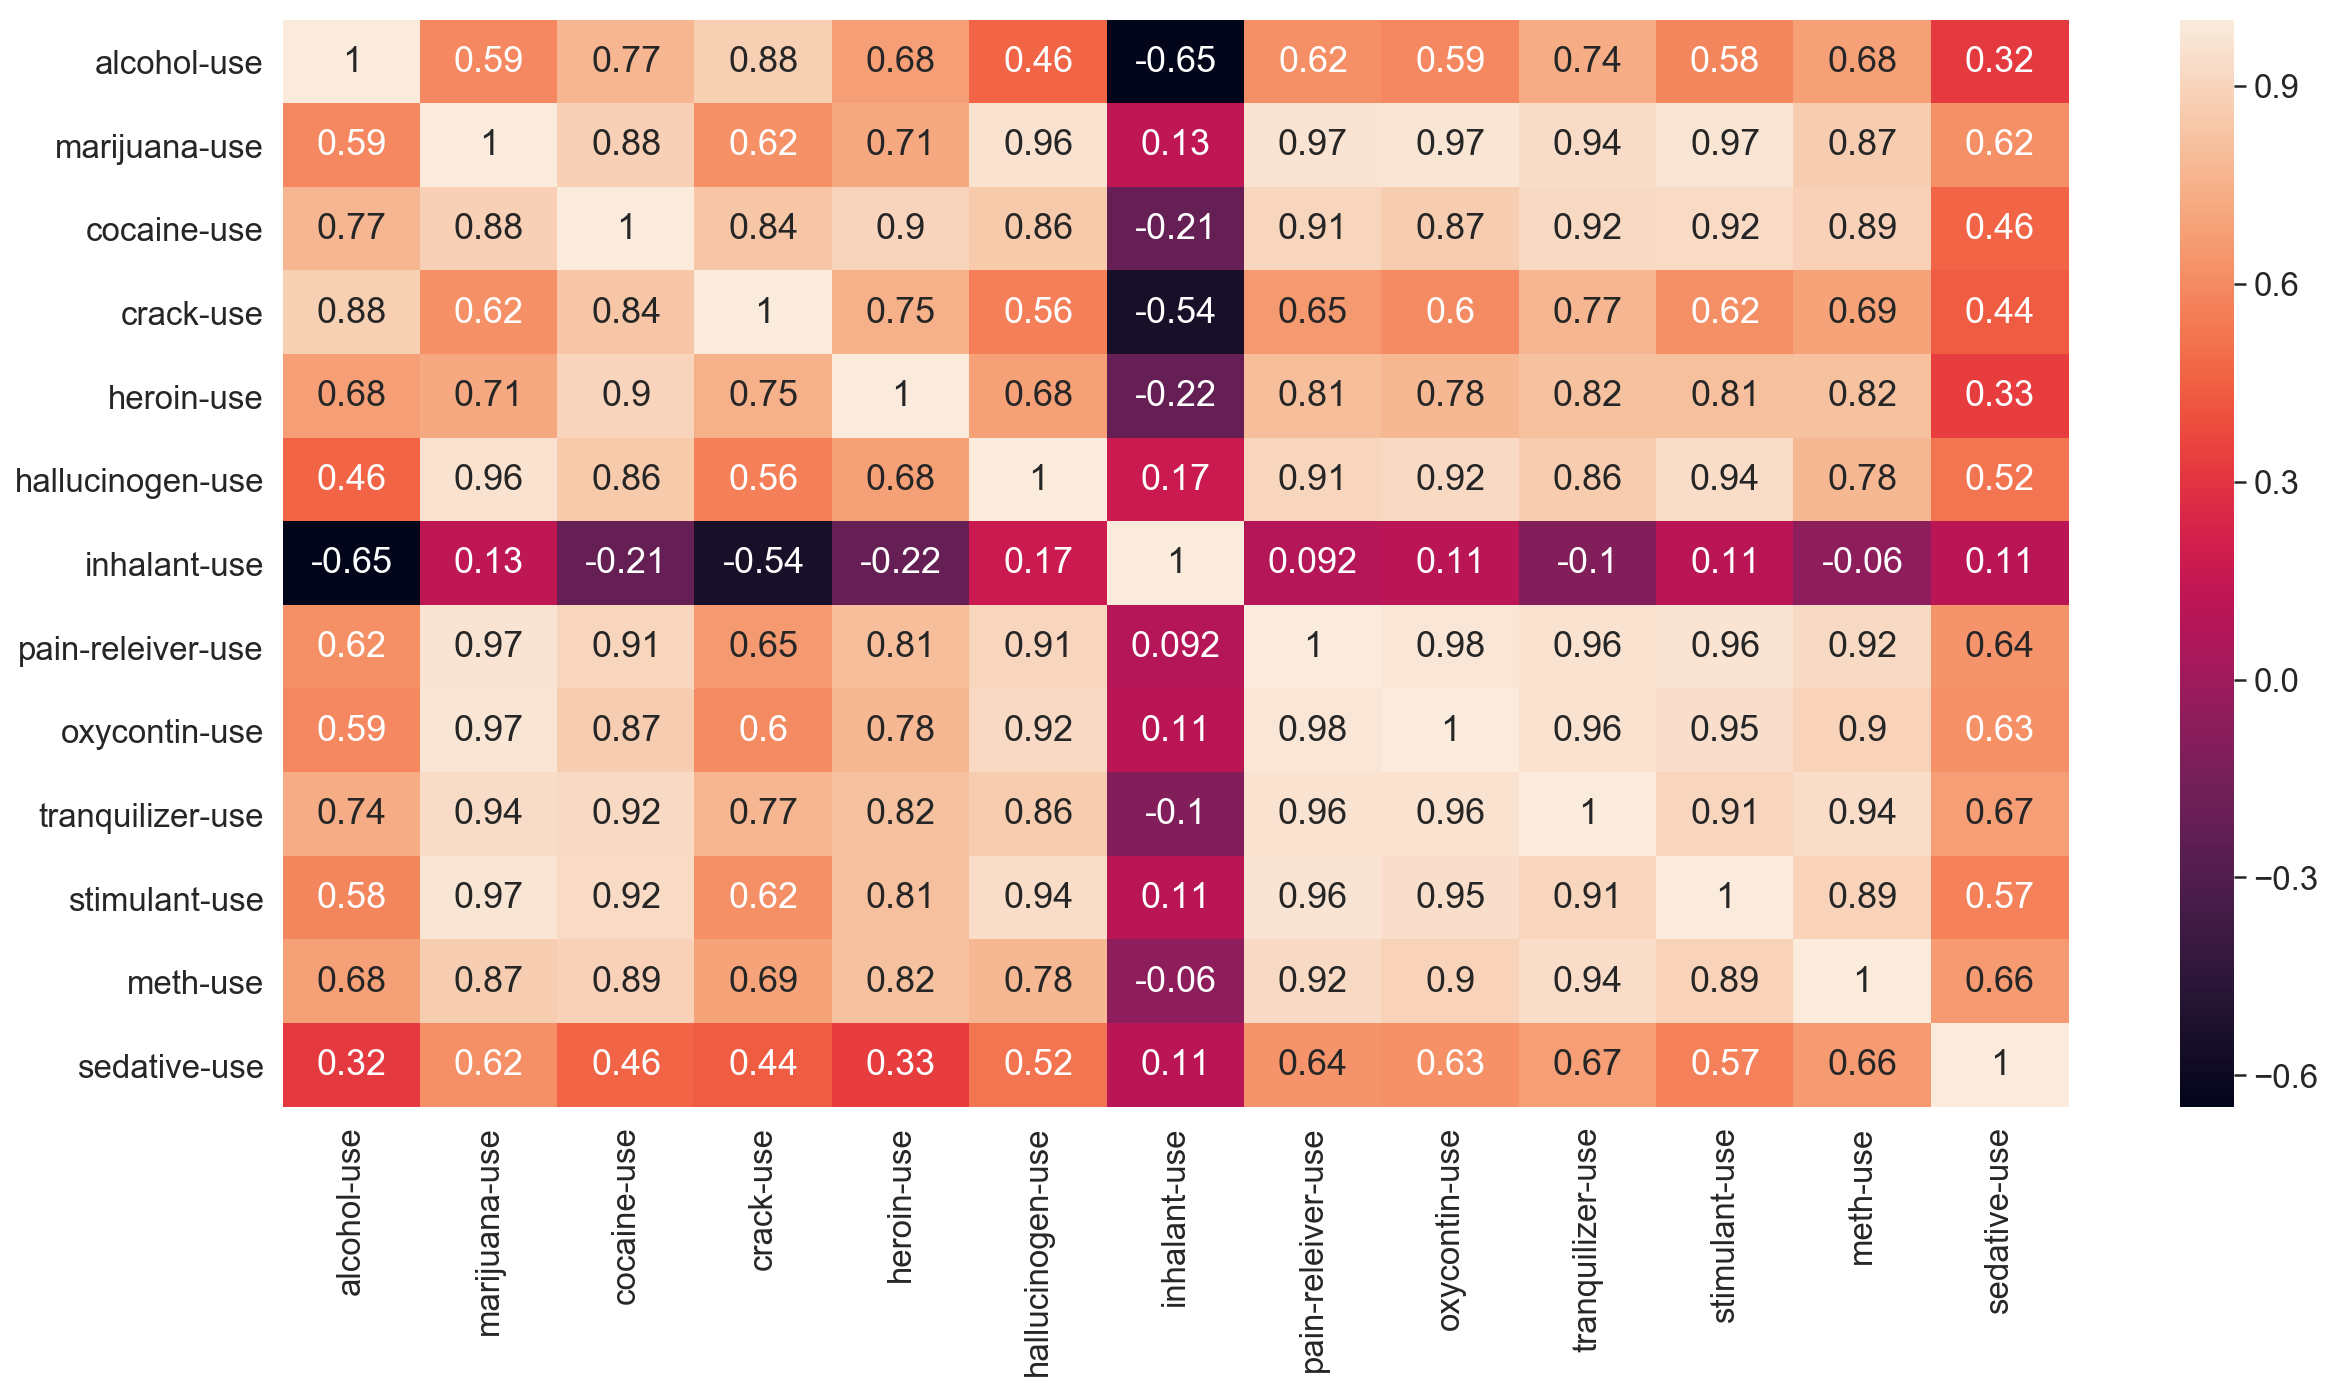

In [58]:
#please rerun this line again = not sure why the formatting is off when the kernel is restarted :(
#remove "State" and "Difference" columns
exclude_n = drug_use.drop(['n', 'alcohol-frequency','marijuana-frequency','cocaine-frequency', 'crack-frequency', 
           'heroin-frequency', 'hallucinogen-frequency', 'inhalant-frequency', 'pain-releiver-frequency',  
           'oxycontin-frequency', 'tranquilizer-frequency', 'stimulant-frequency', 'meth-frequency', 'sedative-frequency'], axis=1)

#create correlation matrix
sns.heatmap(exclude_n.corr(), annot = True);
sns.set(rc={'figure.figsize':(20,10)},style='whitegrid',font_scale=1.5)

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

**H0:** The mean difference between alcohol and cocaine use is 0
**H1:** The mean difference between alcohol and cocaine use is not 0.

Use the t test to determine if the hypothesis is true

In [43]:
import scipy.stats as stats

In [44]:
# calculate the t statistic
alcohol_users = drug_use['alcohol-frequency']
cocaine_users = drug_use['cocaine-frequency']
stats.ttest_ind(alcohol_users, cocaine_users, nan_policy = 'omit')


Ttest_indResult(statistic=4.486206033161325, pvalue=9.309598194272307e-05)

In [45]:
# pvalue is greater than 5%, 
# hence we cannot conclude that there is a significant difference in the mean between alcohola nd cocaine users

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [46]:
# go back to sat dataset
# only look at the rate variable

In [47]:
rate = sat_scores['Rate']
rate.describe()

count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64

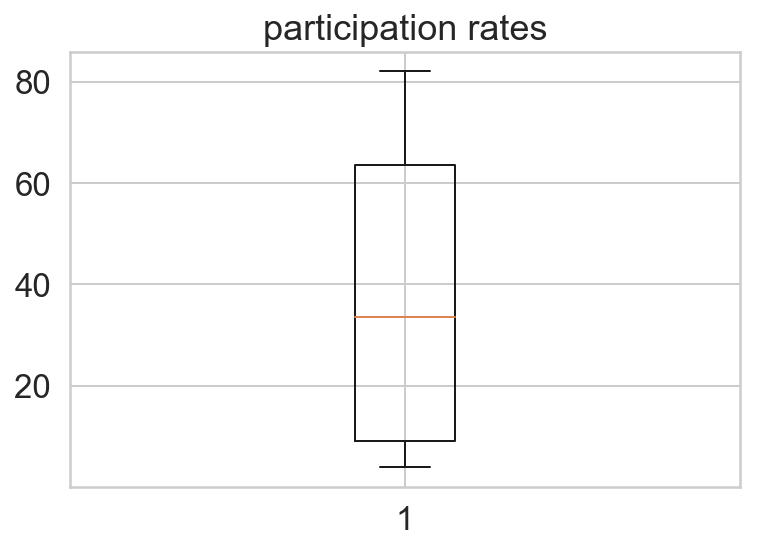

In [48]:
plt.figure(figsize=(6,4))
plt.boxplot(rate)
plt.title('participation rates')
plt.show()

In [49]:
#determine z score
z = np.abs(stats.zscore(rate))
print(z)

[1.6586345  1.62164951 1.54767954 1.47370956 1.28878461 1.25179962
 1.25179962 1.17782965 1.17782965 1.14084466 1.10385967 1.02988969
 1.02988969 0.95591971 0.84496475 0.73400978 0.69702479 0.6600398
 0.62305481 0.58606982 0.58606982 0.54908484 0.51209985 0.51209985
 0.11664496 0.15362995 0.22759993 0.41252488 0.52347984 0.70840479
 0.74538978 0.89332973 0.89332973 0.93031472 0.93031472 0.96729971
 0.96729971 1.04126969 1.04126969 1.04126969 1.07825468 1.07825468
 1.07825468 1.11523967 1.15222465 1.15222465 1.18920964 1.18920964
 1.22619463 1.22619463 1.22619463 0.29018991]


In [50]:
threshold = 3
print(np.where(z > 3))

#there are no outliers based on z scores

(array([], dtype=int64),)


In [51]:
rate_removed = rate[(z < 3)]
rate_removed.shape

(52,)

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [52]:
verbal = sat_scores['Verbal']
math = sat_scores['Math']

In [53]:
# pearson correlation
stats.ttest_ind(verbal, math, nan_policy = 'omit')

Ttest_indResult(statistic=0.07640124623882805, pvalue=0.9392495359502075)

In [54]:
# spearman rank correlation
import scipy.stats
scipy.stats.spearmanr(verbal, math)[0]

0.9052048847940284

In [55]:
# Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are 
# normally distributed.

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [56]:
from scipy.stats import percentileofscore
sat_scores['Rate_percentiles'] = rate.apply(lambda x: percentileofscore(rate, x))
sat_scores[sat_scores['State'] == 'CA'].head()


,State,Rate,Verbal,Math,Difference,Rate_percentiles
23,CA,51,498,517,-19,56.730769


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

In [57]:
#drug use dataset